In [1]:
import math
def vert_coord(radius):
    
    scaler = radius/(2*math.sin(2*math.pi/5))
    m = (1+5**0.5)/2
    v0 = [0, 1, m]
    v1 = [0, 1, -m]
    v2 = [0, -1, m]
    v3 = [0, -1, -m]
    v4 = [1, m, 0]
    v5 = [1, -m, 0]
    v6 = [-1, m, 0]
    v7 = [-1, -m, 0]
    v8 = [m, 0, 1]
    v9 = [m, 0, -1]
    v10 = [-m, 0, 1]
    v11 = [-m, 0, -1]
    VertCoord = [v0, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11]
    VertCoord_ = []
    for i in VertCoord:
        temp_list = []
        for j in i:
            temp = j*scaler
            temp_list.append(temp)
        VertCoord_.append(temp_list)
    return VertCoord_

if __name__ == '__main__':
    print(vert_coord(radius = 45))

[[0.0, 23.657900045361014, 38.2792863758418], [0.0, 23.657900045361014, -38.2792863758418], [0.0, -23.657900045361014, 38.2792863758418], [0.0, -23.657900045361014, -38.2792863758418], [23.657900045361014, 38.2792863758418, 0.0], [23.657900045361014, -38.2792863758418, 0.0], [-23.657900045361014, 38.2792863758418, 0.0], [-23.657900045361014, -38.2792863758418, 0.0], [38.2792863758418, 0.0, 23.657900045361014], [38.2792863758418, 0.0, -23.657900045361014], [-38.2792863758418, 0.0, 23.657900045361014], [-38.2792863758418, 0.0, -23.657900045361014]]


In [2]:
def distance(a, b):
    # a seperated function for calculating the distance between two coordinates
    n = 15
    return round(((a[0] - b[0])**2 + (a[1] - b[1])**2 + (a[2] - b[2])**2)**0.5, n)

if __name__ == '__main__':
    coord = vert_coord(radius = 45)
    print('radius = ', distance([0, 0, 0], coord[0]))
    print('edge length = ', distance(coord[0], coord[1]))

radius =  45.0
edge length =  76.5585727516836


In [3]:
def mid_pt(a, b):
    # this is a seperate function for calculating mid point of two coords
    n = 15
    return [round((a[0]+b[0])/2, n), round((a[1]+b[1])/2, n), round((a[2]+b[2])/2, n)]

if __name__ == '__main__':
    print(mid_pt([1, 2, 3], [4, 5, 6]))

[2.5, 3.5, 4.5]


In [4]:
from numpy import *

def COM_leg(COM, a, b, c, d, e):
    lega = mid_pt(COM, a)
    legb = mid_pt(COM, b)
    legc = mid_pt(COM, c)
    legd = mid_pt(COM, d)
    lege = mid_pt(COM, e)
    result = [around(COM, 10), around(lega, 10), around(legb, 10), around(legc, 10), around(legd, 10), around(lege, 10)]
    return result

if __name__ == '__main__':
    coord = vert_coord(radius = 45)
    print(COM_leg(coord[0], coord[2], coord[8], coord[4], coord[6], coord[10]))

[array([ 0.        , 23.65790005, 38.27928638]), array([ 0.        ,  0.        , 38.27928638]), array([19.13964319, 11.82895002, 30.96859321]), array([11.82895002, 30.96859321, 19.13964319]), array([-11.82895002,  30.96859321,  19.13964319]), array([-19.13964319,  11.82895002,  30.96859321])]


In [5]:
def COM_leg_gen(radius):
    coord = vert_coord(radius)
    COM_leg_list = []
    COM_leg_list.append(COM_leg(coord[0], coord[2], coord[8], coord[4], coord[6], coord[10]))
    COM_leg_list.append(COM_leg(coord[1], coord[4], coord[6], coord[11], coord[3], coord[9]))
    COM_leg_list.append(COM_leg(coord[2], coord[0], coord[10], coord[7], coord[5], coord[8]))
    COM_leg_list.append(COM_leg(coord[3], coord[1], coord[11], coord[7], coord[5], coord[9]))
    COM_leg_list.append(COM_leg(coord[4], coord[0], coord[6], coord[1], coord[9], coord[8]))
    COM_leg_list.append(COM_leg(coord[5], coord[2], coord[8], coord[7], coord[3], coord[9]))
    COM_leg_list.append(COM_leg(coord[6], coord[0], coord[10], coord[11], coord[1], coord[4]))
    COM_leg_list.append(COM_leg(coord[7], coord[3], coord[11], coord[10], coord[2], coord[5]))
    COM_leg_list.append(COM_leg(coord[8], coord[0], coord[2], coord[5], coord[9], coord[4]))
    COM_leg_list.append(COM_leg(coord[9], coord[8], coord[4], coord[1], coord[3], coord[5]))
    COM_leg_list.append(COM_leg(coord[10], coord[0], coord[2], coord[7], coord[11], coord[6]))
    COM_leg_list.append(COM_leg(coord[11], coord[10], coord[7], coord[3], coord[1], coord[6]))
    
    return COM_leg_list

def COM_leg_valid(radius):
    COM_leg_list = COM_leg_gen(radius)
    leg_pool = []
    count = 0
    for i in COM_leg_list:
        for j in range(len(i)):
            if j != 0:
                if list(i[j]) not in leg_pool:
                    count += 1
                    leg_pool.append(list(i[j]))
    print('Number of leg = ', count, '(should be 30)')

if __name__ == '__main__':
    COM_leg_valid(radius = 45)

Number of leg =  30 (should be 30)


In [6]:
def leg_reduce(COM, leg, sigma):   
    red_len = sigma/2
    ratio = 1 - red_len/distance(COM, leg)
    leg_red = []
    for i in range(0, 3):
        leg_red.append(round((leg[i] - COM[i])*ratio + COM[i], 8))
    return leg_red
                
def leg_reduce_valid(a, b, c, d, sigma):
    # validate the reduced length of legs is correct
    n = 10
    result_1 = leg_reduce(a, b, sigma)
    result_2 = leg_reduce(c, d, sigma)
    dis = distance(result_1, result_2)
    print('Actual distance: ', round(dis, 8))
    print('Assigned sigma: ', sigma)
    if round(dis, n) == sigma:
        print('Result match!\n')
    else:
        print('Result does not match!\n')

if __name__ == '__main__':
    coord = COM_leg_gen(radius = 45)
    leg_reduce_valid(coord[0][0], coord[0][1], coord[2][0], coord[2][1], 1)
    leg_reduce_valid(coord[3][0], coord[3][4], coord[5][0], coord[5][4], 2)
    leg_reduce_valid(coord[7][0], coord[7][2], coord[11][0], coord[11][2], 5)

Actual distance:  1.0
Assigned sigma:  1
Result match!

Actual distance:  2.0
Assigned sigma:  2
Result does not match!

Actual distance:  5.0
Assigned sigma:  5
Result does not match!



In [7]:
def leg_reduce_coor_gen(radius, sigma):
    # Generating all the coords of COM and legs when sigma exists
    COM_leg_list = COM_leg_gen(radius)
    COM_leg_red_list = []
    for elements in COM_leg_list:
        temp_list = []
        temp_list.append(elements[0])
        i = 1
        while i <= 5:
            temp_list.append(leg_reduce(elements[0], elements[i], sigma))
            i += 1
        COM_leg_red_list.append(temp_list)
    print('Number of elements in list: ', len(COM_leg_red_list), '(should be 12)\n')
    return COM_leg_red_list

if __name__ == '__main__':
    result = leg_reduce_coor_gen(radius = 45, sigma = 1)
    for i in result:
        print(i, '\n')

Number of elements in list:  12 (should be 12)

[array([ 0.        , 23.65790005, 38.27928638]), [0.0, 0.5, 38.27928638], [18.73513469, 12.07895002, 31.12310171], [11.57895002, 30.81408471, 19.54415169], [-11.57895002, 30.81408471, 19.54415169], [-18.73513469, 12.07895002, 31.12310171]] 

[array([  0.        ,  23.65790005, -38.27928638]), [11.57895002, 30.81408471, -19.54415169], [-11.57895002, 30.81408471, -19.54415169], [-18.73513469, 12.07895002, -31.12310171], [0.0, 0.5, -38.27928638], [18.73513469, 12.07895002, -31.12310171]] 

[array([  0.        , -23.65790005,  38.27928638]), [0.0, -0.5, 38.27928638], [-18.73513469, -12.07895002, 31.12310171], [-11.57895002, -30.81408471, 19.54415169], [11.57895002, -30.81408471, 19.54415169], [18.73513469, -12.07895002, 31.12310171]] 

[array([  0.        , -23.65790005, -38.27928638]), [0.0, -0.5, -38.27928638], [-18.73513469, -12.07895002, -31.12310171], [-11.57895002, -30.81408471, -19.54415169], [11.57895002, -30.81408471, -19.54415169], 

Number of elements in list:  12 (should be 12)



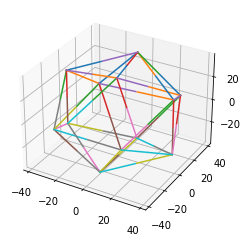

In [8]:
from mpl_toolkits.mplot3d import axes3d  
import matplotlib.pyplot as plt  
 
# visualize the model
def sig_vis(list, ax):
    for i in range(1, 6):
        figure = ax.plot([list[0][0], list[i][0]], [list[0][1], list[i][1]], [list[0][2], list[i][2]])

def vis(lst):
    fig = plt.figure(1)  
    ax = fig.gca(projection='3d')
    for element in lst:
        sig_vis(element, ax) 
    plt.show()

if __name__ == '__main__':
    lst = leg_reduce_coor_gen(radius = 45, sigma = 1)
    vis(lst)

In [9]:
import numpy as np

# calculating the 5 angles according to the coords of legs and COM
# see SI of the NERDSS paper II part for detail
def angle_cal(COM1, leg1, COM2, leg2):
    n = 8
    c1 = np.array(COM1)
    p1 = np.array(leg1)
    c2 = np.array(COM2)
    p2 = np.array(leg2)
    v1 = p1 - c1
    v2 = p2 - c2
    sig1 = p1 - p2
    sig2 = -sig1
    theta1 = round(math.acos(np.dot(v1, sig1)/(np.linalg.norm(v1)*np.linalg.norm(sig1))), n)
    theta2 = round(math.acos(np.dot(v2, sig2)/(np.linalg.norm(v2)*np.linalg.norm(sig2))), n)
    print('-----------------------')
    print('theta1 = ', round(theta1/math.pi, n), 'pi')
    print('theta2 = ', round(theta2/math.pi, n), 'pi')

    t1 = np.cross(v1, sig1)
    t2 = np.cross(v1, c1) # n1 = c1 here
    t1_hat = t1/np.linalg.norm(t1)
    t2_hat = t2/np.linalg.norm(t2)
    phi1 = round(math.acos(np.around(np.dot(t1_hat, t2_hat), n)), n)
    t3 = np.cross(v2, sig2)
    t4 = np.cross(v2, c2) # n2 = c2 here
    t3_hat = t3/np.linalg.norm(t3)
    t4_hat = t4/np.linalg.norm(t4)
    phi2 = round(math.acos(np.around(np.dot(t3_hat, t4_hat), n)), n)
    print('phi1 = ', round(phi1/math.pi, n), 'pi')
    print('phi2 = ', round(phi2/math.pi, n), 'pi')

    t1_ = np.cross(sig1, v1)
    t2_ = np.cross(sig1, v2)
    t1__hat = t1/np.linalg.norm(t1)
    t2__hat = t2/np.linalg.norm(t2)
    omega = round(math.acos(np.around(np.dot(t1__hat, t2__hat), n)), n)
    print('omega = ', round(omega/math.pi, n), 'pi')
    
    print('COM1 = ', COM1)
    print('COM2 = ', COM2)
    print('leg1 = ', leg1)
    print('leg2 = ', leg2)
    print('c1 = ', c1)
    print('c2 = ', c2)
    
    return theta1, theta2, phi1, phi2, omega

if __name__ == '__main__':
    coord = leg_reduce_coor_gen(radius = 45, sigma = 1)
    print(angle_cal(coord[0][0], coord[0][1], coord[2][0], coord[2][1]))
#     print(angle_cal(coord[2][0], coord[2][2], coord[14][0], coord[14][1]))
#     print(angle_cal(coord[7][0], coord[7][1], coord[5][0], coord[5][1]))

Number of elements in list:  12 (should be 12)

-----------------------
theta1 =  1.0 pi
theta2 =  1.0 pi
phi1 =  0.0 pi
phi2 =  0.0 pi
omega =  0.0 pi
COM1 =  [ 0.         23.65790005 38.27928638]
COM2 =  [  0.         -23.65790005  38.27928638]
leg1 =  [0.0, 0.5, 38.27928638]
leg2 =  [0.0, -0.5, 38.27928638]
c1 =  [ 0.         23.65790005 38.27928638]
c2 =  [  0.         -23.65790005  38.27928638]
(3.14159265, 3.14159265, 0.0, 0.0, 0.0)


In [10]:
# calculate coordinates of normalized COM and legs
def input_coord(radius, sigma):

    coor = leg_reduce_coor_gen(radius, sigma)
    coor_ = np.array(coor[0])
    COM = around(coor_[0] - coor_[0], 12)
    lg1 = around(coor_[1] - coor_[0], 12)
    lg2 = around(coor_[2] - coor_[0], 12)
    lg3 = around(coor_[3] - coor_[0], 12)
    lg4 = around(coor_[4] - coor_[0], 12)
    lg5 = around(coor_[5] - coor_[0], 12)
    n = around(coor_[0]/np.linalg.norm(coor_[0]), 12)
    
    print('COM = ', COM)
    print('lg1 = ', lg1)
    print('lg2 = ', lg2)
    print('lg3 = ', lg3)
    print('lg4 = ', lg4)
    print('lg5 = ', lg5)
    print('n   = ', n)
    
    return COM, lg1, lg2, lg3, lg4, lg5, n

if __name__ == '__main__':
    input_coord(radius = 45, sigma = 1)

Number of elements in list:  12 (should be 12)

COM =  [0. 0. 0.]
lg1 =  [ 0.00000e+00 -2.31579e+01  4.20000e-09]
lg2 =  [ 18.73513469 -11.57895003  -7.15618467]
lg3 =  [ 11.57895002   7.15618466 -18.73513469]
lg4 =  [-11.57895002   7.15618466 -18.73513469]
lg5 =  [-18.73513469 -11.57895003  -7.15618467]
n   =  [0.         0.52573111 0.85065081]


Number of elements in list:  12 (should be 12)

COM =  [0. 0. 0.]
lg1 =  [ 0.00000e+00 -2.31579e+01  4.20000e-09]
lg2 =  [ 18.73513469 -11.57895003  -7.15618467]
lg3 =  [ 11.57895002   7.15618466 -18.73513469]
lg4 =  [-11.57895002   7.15618466 -18.73513469]
lg5 =  [-18.73513469 -11.57895003  -7.15618467]
n   =  [0.         0.52573111 0.85065081]


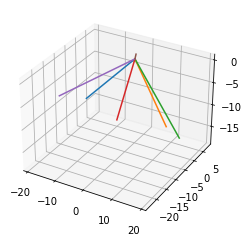

In [11]:
def sig_vis2(list, ax, n):
    for i in range(1, 6):
        figure = ax.plot([list[0][0], list[i][0]], [list[0][1], list[i][1]], [list[0][2], list[i][2]])
    figure = ax.plot([n[0], list[0][0]], [n[1], list[0][1]], [n[2], list[0][2]])
        
def vis2(lst, n):
    fig = plt.figure(1)  
    ax = fig.gca(projection='3d')
    for element in lst:
        sig_vis2(element, ax, n) 
    plt.show()

if __name__ == '__main__':
    COM, lg1, lg2, lg3, lg4, lg5, n = input_coord(radius = 45, sigma = 1)
    vis2([[COM, lg1, lg2, lg3, lg4, lg5]], n)

In [12]:
import math

def center_coor(a, b, c, d, e):
    # calculate the center of mass(COM) according to 5 coords on the same face
    n = 8
    mid_a = mid_pt(c, d)
    mid_b = mid_pt(d, e)
    mid_c = mid_pt(a, e)
    COM_a = []
    COM_b = []
    COM_c = []
    # calculate 3 COM here and check if they are overlapped
    for i in range(0, 3):
        COM_a.append(round(a[i] + (mid_a[i] - a[i])/(1+math.sin(0.3*math.pi)), 14))
        COM_b.append(round(b[i] + (mid_b[i] - b[i])/(1+math.sin(0.3*math.pi)), 14))
        COM_c.append(round(c[i] + (mid_c[i] - c[i])/(1+math.sin(0.3*math.pi)), 14))
        
    # checking overlap
    if round(COM_a[0], n) == round(COM_b[0], n) and round(COM_b[0], n) == round(COM_c[0], n) and round(COM_a[1], n) == round(COM_b[1], n) and round(COM_b[1], n) == round(COM_c[1], n) and round(COM_a[2], n) == round(COM_b[2], n) and round(COM_b[2], n) == round(COM_c[2], n):
        print('COM coordinates match!')
        return COM_a
    else:
        print('COM coordinates do not match!')
        print(COM_a)
        print(COM_b)
        print(COM_c)
        return COM_a
    
if __name__ == '__main__':
    COM, lg1, lg2, lg3, lg4, lg5, n = input_coord(radius = 45, sigma = 1)
    print('center = ', center_coor(lg1, lg2, lg3, lg4, lg5))

Number of elements in list:  12 (should be 12)

COM =  [0. 0. 0.]
lg1 =  [ 0.00000e+00 -2.31579e+01  4.20000e-09]
lg2 =  [ 18.73513469 -11.57895003  -7.15618467]
lg3 =  [ 11.57895002   7.15618466 -18.73513469]
lg4 =  [-11.57895002   7.15618466 -18.73513469]
lg5 =  [-18.73513469 -11.57895003  -7.15618467]
n   =  [0.         0.52573111 0.85065081]
COM coordinates match!
center =  [0.0, -6.4006861528494, -10.35652773890911]


In [13]:
def check_dis(cen, COM, lg1, lg2, lg3, lg4, lg5):
    dis1 = round(distance(cen, lg1), 8)
    dis2 = round(distance(cen, lg2), 8)
    dis3 = round(distance(cen, lg3), 8)
    dis4 = round(distance(cen, lg4), 8)
    dis5 = round(distance(cen, lg5), 8)
    dis_ = round(distance(COM, cen), 8)
    if dis1 == dis2 and dis1 == dis3 and dis1 == dis4 and dis1 == dis5:
        print('Distance match!')
        return dis1, dis_
    else:
        print('Distance do not match!')
        return dis1, dis_
    
if __name__ == '__main__':
    COM, lg1, lg2, lg3, lg4, lg5, n = input_coord(radius = 45, sigma = 1)
    cen = center_coor(lg1, lg2, lg3, lg4, lg5)
    check_dis(cen, COM, lg1, lg2, lg3, lg4, lg5)

Number of elements in list:  12 (should be 12)

COM =  [0. 0. 0.]
lg1 =  [ 0.00000e+00 -2.31579e+01  4.20000e-09]
lg2 =  [ 18.73513469 -11.57895003  -7.15618467]
lg3 =  [ 11.57895002   7.15618466 -18.73513469]
lg4 =  [-11.57895002   7.15618466 -18.73513469]
lg5 =  [-18.73513469 -11.57895003  -7.15618467]
n   =  [0.         0.52573111 0.85065081]
COM coordinates match!
Distance match!


In [14]:
from math import *

def norm_input(scaler, dis_):
    c1 = cos(2*pi/5)
    c2 = cos(pi/5)
    s1 = sin(2*pi/5)
    s2 = sin(4*pi/5)
    v0 = scaler*np.array([0, 1])
    v1 = scaler*np.array([-s1, c1])
    v2 = scaler*np.array([-s2, -c2])
    v3 = scaler*np.array([s2, -c2])
    v4 = scaler*np.array([s1, c1])
    lg1 = np.array([v0[0], v0[1], -dis_])
    lg2 = np.array([v1[0], v1[1], -dis_])
    lg3 = np.array([v2[0], v2[1], -dis_])
    lg4 = np.array([v3[0], v3[1], -dis_])
    lg5 = np.array([v4[0], v4[1], -dis_])
    COM = np.array([0, 0, 0])
    n = np.array([0, 0, 1])
    
    print('---------------------------------------------------')
    print('Final input coord:')

    print('COM = ', COM)
    print('lg1 = ', lg1)
    print('lg2 = ', lg2)
    print('lg3 = ', lg3)
    print('lg4 = ', lg4)
    print('lg5 = ', lg5)
    print('n = ', n)
    
    return COM, lg1, lg2, lg3, lg4, lg5, n
    
if __name__ == '__main__':
    COM, lg1, lg2, lg3, lg4, lg5, n = input_coord(radius = 45, sigma = 1)
    cen = center_coor(lg1, lg2, lg3, lg4, lg5)
    scaler, dis_ = check_dis(cen, COM, lg1, lg2, lg3, lg4, lg5)
    norm_input(scaler, dis_)

Number of elements in list:  12 (should be 12)

COM =  [0. 0. 0.]
lg1 =  [ 0.00000e+00 -2.31579e+01  4.20000e-09]
lg2 =  [ 18.73513469 -11.57895003  -7.15618467]
lg3 =  [ 11.57895002   7.15618466 -18.73513469]
lg4 =  [-11.57895002   7.15618466 -18.73513469]
lg5 =  [-18.73513469 -11.57895003  -7.15618467]
n   =  [0.         0.52573111 0.85065081]
COM coordinates match!
Distance match!
---------------------------------------------------
Final input coord:
COM =  [0 0 0]
lg1 =  [  0.          19.69928639 -12.17482854]
lg2 =  [-18.73513469   6.08741427 -12.17482854]
lg3 =  [-11.57895002 -15.93705747 -12.17482854]
lg4 =  [ 11.57895002 -15.93705747 -12.17482854]
lg5 =  [ 18.73513469   6.08741427 -12.17482854]
n =  [0 0 1]


Number of elements in list:  12 (should be 12)

COM =  [0. 0. 0.]
lg1 =  [ 0.00000e+00 -2.31579e+01  4.20000e-09]
lg2 =  [ 18.73513469 -11.57895003  -7.15618467]
lg3 =  [ 11.57895002   7.15618466 -18.73513469]
lg4 =  [-11.57895002   7.15618466 -18.73513469]
lg5 =  [-18.73513469 -11.57895003  -7.15618467]
n   =  [0.         0.52573111 0.85065081]
COM coordinates match!
Distance match!
---------------------------------------------------
Final input coord:
COM =  [0 0 0]
lg1 =  [  0.          19.69928639 -12.17482854]
lg2 =  [-18.73513469   6.08741427 -12.17482854]
lg3 =  [-11.57895002 -15.93705747 -12.17482854]
lg4 =  [ 11.57895002 -15.93705747 -12.17482854]
lg5 =  [ 18.73513469   6.08741427 -12.17482854]
n =  [0 0 1]


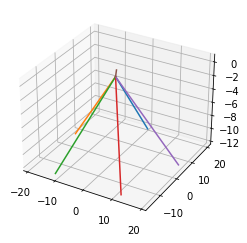

In [15]:
if __name__ == '__main__':
    COM, lg1, lg2, lg3, lg4, lg5, n = input_coord(radius = 45, sigma = 1)
    cen = center_coor(lg1, lg2, lg3, lg4, lg5)
    scaler, dis_ = check_dis(cen, COM, lg1, lg2, lg3, lg4, lg5)
    COM_, lg1_, lg2_, lg3_, lg4_, lg5_, n_ = norm_input(scaler, dis_)
    vis2([[COM_, lg1_, lg2_, lg3_, lg4_, lg5_]], n)

In [16]:
def leg_len_valid(radius, sigma):
    COM, lg1, lg2, lg3, lg4, lg5, n = input_coord(radius = 45, sigma = 1)
    cen = center_coor(lg1, lg2, lg3, lg4, lg5)
    scaler, dis_ = check_dis(cen, COM, lg1, lg2, lg3, lg4, lg5)
    COM_, lg1_, lg2_, lg3_, lg4_, lg5_, n_ = norm_input(scaler, dis_)
    print(distance(COM, lg1))
    print(distance(COM_, lg1_))
    print(distance(COM, lg3))
    print(distance(COM_, lg3_))

if __name__ == '__main__':
    leg_len_valid(radius = 45, sigma = 1)

Number of elements in list:  12 (should be 12)

COM =  [0. 0. 0.]
lg1 =  [ 0.00000e+00 -2.31579e+01  4.20000e-09]
lg2 =  [ 18.73513469 -11.57895003  -7.15618467]
lg3 =  [ 11.57895002   7.15618466 -18.73513469]
lg4 =  [-11.57895002   7.15618466 -18.73513469]
lg5 =  [-18.73513469 -11.57895003  -7.15618467]
n   =  [0.         0.52573111 0.85065081]
COM coordinates match!
Distance match!
---------------------------------------------------
Final input coord:
COM =  [0 0 0]
lg1 =  [  0.          19.69928639 -12.17482854]
lg2 =  [-18.73513469   6.08741427 -12.17482854]
lg3 =  [-11.57895002 -15.93705747 -12.17482854]
lg4 =  [ 11.57895002 -15.93705747 -12.17482854]
lg5 =  [ 18.73513469   6.08741427 -12.17482854]
n =  [0 0 1]
23.1579000454
23.157900039805806
23.15790003896252
23.157900039805806


In [17]:
def norm_input_final(radius, sigma):
    COM_, lg1_, lg2_, lg3_, lg4_, lg5_, n_ = input_coord(radius, sigma)
    cen_ = center_coor(lg1_, lg2_, lg3_, lg4_, lg5_)
    scaler, dis_ = check_dis(cen_, COM_, lg1_, lg2_, lg3_, lg4_, lg5_)
    COM, lg1, lg2, lg3, lg4, lg5, n = norm_input(scaler, dis_)
    
    f = open('parm.inp', 'w')
    f.write(' # Input file (icosahedron vertex-centered)\n\n')
    f.write('start parameters\n')
    f.write('    nItr = 10000000 #iterations\n')
    f.write('    timeStep = 0.1\n')
    f.write('    timeWrite = 10000\n')
    f.write('    pdbWrite = 10000\n')
    f.write('    trajWrite = 10000\n')
    f.write('    restartWrite = 50000\n')
    f.write('    checkPoint = 1000000\n')
    f.write('    overlapSepLimit = 7.0\n')
    f.write('end parameters\n\n')
    f.write('start boundaries\n')
    f.write('    WaterBox = [500,500,500]\n')
    f.write('end boundaries\n\n')
    f.write('start molecules\n')
    f.write('    icos : 200\n')
    f.write('end molecules\n\n')
    f.write('start reactions\n')
    f.write('    icos(lg1) + icos(lg1) <-> icos(lg1!1).icos(lg1!1)\n')
    f.write('    onRate3Dka = 2\n')
    f.write('    offRatekb = 2\n')
    f.write('    norm1 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    norm2 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    sigma = ' + str(float(sigma)) + '\n')
    f.write('    assocAngles = [M_PI, M_PI, nan, nan, 0]\n')
    f.write('    observeLabel = leg\n')
    f.write('    bindRadSameCom = 5.0\n')
    f.write('\n')
    f.write('    icos(lg2) + icos(lg2) <-> icos(lg2!1).icos(lg2!1)\n')
    f.write('    onRate3Dka = 2\n')
    f.write('    offRatekb = 2\n')
    f.write('    norm1 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    norm2 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    sigma = ' + str(float(sigma)) + '\n')
    f.write('    assocAngles = [M_PI, M_PI, nan, nan, 0]\n')
    f.write('    observeLabel = leg\n')
    f.write('    bindRadSameCom = 5.0\n')
    f.write('\n')
    f.write('    icos(lg3) + icos(lg3) <-> icos(lg3!1).icos(lg3!1)\n')
    f.write('    onRate3Dka = 2\n')
    f.write('    offRatekb = 2\n')
    f.write('    norm1 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    norm2 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    sigma = ' + str(float(sigma)) + '\n')
    f.write('    assocAngles = [M_PI, M_PI, nan, nan, 0]\n')
    f.write('    observeLabel = leg\n')
    f.write('    bindRadSameCom = 5.0\n')
    f.write('\n')
    f.write('    icos(lg4) + icos(lg4) <-> icos(lg4!1).icos(lg4!1)\n')
    f.write('    onRate3Dka = 2\n')
    f.write('    offRatekb = 2\n')
    f.write('    norm1 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    norm2 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    sigma = ' + str(float(sigma)) + '\n')
    f.write('    assocAngles = [M_PI, M_PI, nan, nan, 0]\n')
    f.write('    observeLabel = leg\n')
    f.write('    bindRadSameCom = 5.0\n')
    f.write('\n')
    f.write('    icos(lg5) + icos(lg5) <-> icos(lg5!1).icos(lg5!1)\n')
    f.write('    onRate3Dka = 2\n')
    f.write('    offRatekb = 2\n')
    f.write('    norm1 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    norm2 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    sigma = ' + str(float(sigma)) + '\n')
    f.write('    assocAngles = [M_PI, M_PI, nan, nan, 0]\n')
    f.write('    observeLabel = leg\n')
    f.write('    bindRadSameCom = 5.0\n')
    f.write('\n')
    f.write('    icos(lg1) + icos(lg2) <-> icos(lg1!1).icos(lg2!1)\n')
    f.write('    onRate3Dka = 4\n')
    f.write('    offRatekb = 2\n')
    f.write('    norm1 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    norm2 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    sigma = ' + str(float(sigma)) + '\n')
    f.write('    assocAngles = [M_PI, M_PI, nan, nan, 0]\n')
    f.write('    observeLabel = leg\n')
    f.write('    bindRadSameCom = 5.0\n')
    f.write('\n')
    f.write('    icos(lg1) + icos(lg3) <-> icos(lg1!1).icos(lg3!1)\n')
    f.write('    onRate3Dka = 4\n')
    f.write('    offRatekb = 2\n')
    f.write('    norm1 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    norm2 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    sigma = ' + str(float(sigma)) + '\n')
    f.write('    assocAngles = [M_PI, M_PI, nan, nan, 0]\n')
    f.write('    observeLabel = leg\n')
    f.write('    bindRadSameCom = 5.0\n')
    f.write('\n')
    f.write('    icos(lg1) + icos(lg4) <-> icos(lg1!1).icos(lg4!1)\n')
    f.write('    onRate3Dka = 4\n')
    f.write('    offRatekb = 2\n')
    f.write('    norm1 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    norm2 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    sigma = ' + str(float(sigma)) + '\n')
    f.write('    assocAngles = [M_PI, M_PI, nan, nan, 0]\n')
    f.write('    observeLabel = leg\n')
    f.write('    bindRadSameCom = 5.0\n')
    f.write('\n')
    f.write('    icos(lg1) + icos(lg5) <-> icos(lg1!1).icos(lg5!1)\n')
    f.write('    onRate3Dka = 4\n')
    f.write('    offRatekb = 2\n')
    f.write('    norm1 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    norm2 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    sigma = ' + str(float(sigma)) + '\n')
    f.write('    assocAngles = [M_PI, M_PI, nan, nan, 0]\n')
    f.write('    observeLabel = leg\n')
    f.write('    bindRadSameCom = 5.0\n')
    f.write('\n')
    f.write('    icos(lg2) + icos(lg3) <-> icos(lg2!1).icos(lg3!1)\n')
    f.write('    onRate3Dka = 4\n')
    f.write('    offRatekb = 2\n')
    f.write('    norm1 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    norm2 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    sigma = ' + str(float(sigma)) + '\n')
    f.write('    assocAngles = [M_PI, M_PI, nan, nan, 0]\n')
    f.write('    observeLabel = leg\n')
    f.write('    bindRadSameCom = 5.0\n')
    f.write('\n')
    f.write('    icos(lg2) + icos(lg4) <-> icos(lg2!1).icos(lg4!1)\n')
    f.write('    onRate3Dka = 4\n')
    f.write('    offRatekb = 2\n')
    f.write('    norm1 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    norm2 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    sigma = ' + str(float(sigma)) + '\n')
    f.write('    assocAngles = [M_PI, M_PI, nan, nan, 0]\n')
    f.write('    observeLabel = leg\n')
    f.write('    bindRadSameCom = 5.0\n')
    f.write('\n')
    f.write('    icos(lg2) + icos(lg5) <-> icos(lg2!1).icos(lg5!1)\n')
    f.write('    onRate3Dka = 4\n')
    f.write('    offRatekb = 2\n')
    f.write('    norm1 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    norm2 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    sigma = ' + str(float(sigma)) + '\n')
    f.write('    assocAngles = [M_PI, M_PI, nan, nan, 0]\n')
    f.write('    observeLabel = leg\n')
    f.write('    bindRadSameCom = 5.0\n')
    f.write('\n')
    f.write('    icos(lg3) + icos(lg4) <-> icos(lg3!1).icos(lg4!1)\n')
    f.write('    onRate3Dka = 4\n')
    f.write('    offRatekb = 2\n')
    f.write('    norm1 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    norm2 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    sigma = ' + str(float(sigma)) + '\n')
    f.write('    assocAngles = [M_PI, M_PI, nan, nan, 0]\n')
    f.write('    observeLabel = leg\n')
    f.write('    bindRadSameCom = 5.0\n')
    f.write('\n')
    f.write('    icos(lg3) + icos(lg5) <-> icos(lg3!1).icos(lg5!1)\n')
    f.write('    onRate3Dka = 4\n')
    f.write('    offRatekb = 2\n')
    f.write('    norm1 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    norm2 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    sigma = ' + str(float(sigma)) + '\n')
    f.write('    assocAngles = [M_PI, M_PI, nan, nan, 0]\n')
    f.write('    observeLabel = leg\n')
    f.write('    bindRadSameCom = 5.0\n')
    f.write('\n')
    f.write('    icos(lg4) + icos(lg5) <-> icos(lg4!1).icos(lg5!1)\n')
    f.write('    onRate3Dka = 4\n')
    f.write('    offRatekb = 2\n')
    f.write('    norm1 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    norm2 = [' + str(n[0]) + ', ' + str(n[1]) + ', ' + str(n[2]) + ']\n')
    f.write('    sigma = ' + str(float(sigma)) + '\n')
    f.write('    assocAngles = [M_PI, M_PI, nan, nan, 0]\n')
    f.write('    observeLabel = leg\n')
    f.write('    bindRadSameCom = 5.0\n')
    f.write('\n')
    f.write('end reactions\n')
    
    f = open('icos.mol', 'w')
    f.write('##\n')
    f.write('# Icosahedron (vertex-centered) information file.\n')
    f.write('##\n\n')
    f.write('Name = icos\n')
    f.write('checkOverlap = true\n\n')
    f.write('# translational diffusion constants\n')
    f.write('D = [13.0, 13.0, 13.0]\n\n')
    f.write('# rotational diffusion constants\n')
    f.write('Dr = [0.03, 0.03, 0.03]\n\n')
    f.write('# Coordinates\n')
    f.write('COM   ' + str(round(COM[0],8)) + '   ' + str(round(COM[1],8)) + '   ' + str(round(COM[2],8)) + '\n')
    f.write('lg1   ' + str(round(lg1[0],8)) + '   ' + str(round(lg1[1],8)) + '   ' + str(round(lg1[2],8)) + '\n')
    f.write('lg2   ' + str(round(lg2[0],8)) + '   ' + str(round(lg2[1],8)) + '   ' + str(round(lg2[2],8)) + '\n')
    f.write('lg3   ' + str(round(lg3[0],8)) + '   ' + str(round(lg3[1],8)) + '   ' + str(round(lg3[2],8)) + '\n')
    f.write('lg4   ' + str(round(lg4[0],8)) + '   ' + str(round(lg4[1],8)) + '   ' + str(round(lg4[2],8)) + '\n')
    f.write('lg5   ' + str(round(lg5[0],8)) + '   ' + str(round(lg5[1],8)) + '   ' + str(round(lg5[2],8)) + '\n')
    f.write('\n')
    f.write('# bonds\n')
    f.write('bonds = 5\n')
    f.write('com lg1\n')
    f.write('com lg2\n')
    f.write('com lg3\n')
    f.write('com lg4\n')
    f.write('com lg5\n')
    f.write('\n')

if __name__ == '__main__':
    norm_input_final(radius = 45, sigma = 1)

Number of elements in list:  12 (should be 12)

COM =  [0. 0. 0.]
lg1 =  [ 0.00000e+00 -2.31579e+01  4.20000e-09]
lg2 =  [ 18.73513469 -11.57895003  -7.15618467]
lg3 =  [ 11.57895002   7.15618466 -18.73513469]
lg4 =  [-11.57895002   7.15618466 -18.73513469]
lg5 =  [-18.73513469 -11.57895003  -7.15618467]
n   =  [0.         0.52573111 0.85065081]
COM coordinates match!
Distance match!
---------------------------------------------------
Final input coord:
COM =  [0 0 0]
lg1 =  [  0.          19.69928639 -12.17482854]
lg2 =  [-18.73513469   6.08741427 -12.17482854]
lg3 =  [-11.57895002 -15.93705747 -12.17482854]
lg4 =  [ 11.57895002 -15.93705747 -12.17482854]
lg5 =  [ 18.73513469   6.08741427 -12.17482854]
n =  [0 0 1]
